<h2 align='center'> Cyclistic: a bike-share program </h2>

<h4 align='center'> (Part 2: Data Analysis & Visualization) </h4>

### 1. Import libraries and datasets

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
# import all cleaned datasets

c_bt_202004 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202004.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202005 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202005.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202006 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202006.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202007 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202007.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202008 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202008.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202009 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202009.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202010 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202010.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202011 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202011.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202012 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202012.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202101 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202101.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202102 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202102.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202103 = pd.read_csv('~/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202103.csv', 
                          parse_dates = ["started_at", "ended_at"])

### 2. Aggregatre 12 datasets into a final dataset

In [34]:
frames = [c_bt_202004, c_bt_202005, c_bt_202006, c_bt_202007, c_bt_202008, c_bt_202009,
          c_bt_202010, c_bt_202011, c_bt_202012, c_bt_202101, c_bt_202102, c_bt_202103]

biketrips = pd.concat(frames)

biketrips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual


### 3. Analyze this dataset

**Note**: 

    For the following analysis, I will trim the dataset "biketrips" by deleting the "start_station_name", "end_station_name", "start_lat", "start_lng", "end_lat", "end_lng" columns for now.

In [35]:
sub_biketrips = biketrips[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_id',
                           'end_station_id', 'member_casual']]

<h4 style="color:green"> (3-1) Divide this dataset based on member riders versus casual riders </h4>

In [36]:
# create a sub dataframe contains all membership rides
m_biketrips = sub_biketrips.groupby(['member_casual']).get_group('member')

# create a sub dataframe contains all casual user rides
c_biketrips = sub_biketrips.groupby(['member_casual']).get_group('casual')

**Note**: 

    Since I've divided the dataset "sub_biketrips" into two sub-dataframes: "m_biketrips" for members and "c_biketrips" for casual riders, I will delete the "member_casual" columns in these two sub-dataframes.

In [37]:
# for m_biketrips: delete "member_casual" column
m_biketrips = m_biketrips.drop(['member_casual'], axis = 1)

# for c_biketrips: delete "member_casual" column
c_biketrips = c_biketrips.drop(['member_casual'], axis = 1)

<h4 style="color:green"> (3-2) How many members versus casual riders have used Cyclistic bike-share program? </h4>

In [38]:
# create a function "values_percents" for autopct argument below to display both percentages and actual values
def values_percents(v):
    return '{:.2f}%\n\n({:,.0f})'.format(v, v * len(sub_biketrips) / 100)

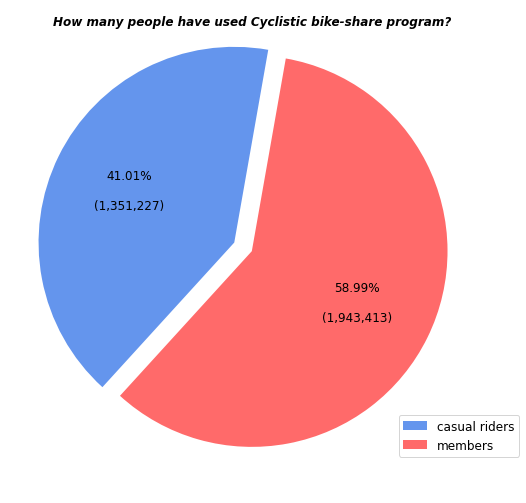

In [55]:
%matplotlib inline

# plot: The total number of members versus the total number of casual riders
plt.figure(figsize=(11, 9))

plt.pie([len(c_biketrips), len(m_biketrips)],
        explode = [0.1, 0],
        colors = ['#6495ed', '#ff6a6a'],
        startangle = 80, 
        autopct = values_percents, 
        textprops = {'fontsize' : 'large'})

plt.legend(labels = ['casual riders', 'members'], 
           loc = (0.8, 0.08), 
           fontsize = 'large')
plt.title("How many people have used Cyclistic bike-share program?",
          y = 0.95,
          fontsize = 'large', 
          fontstyle = 'italic', 
          fontweight = 'bold')
plt.show()

<h4 style="color:green;"> (3-3) Do members versus casual riders have preference on types of bikes? </h4>

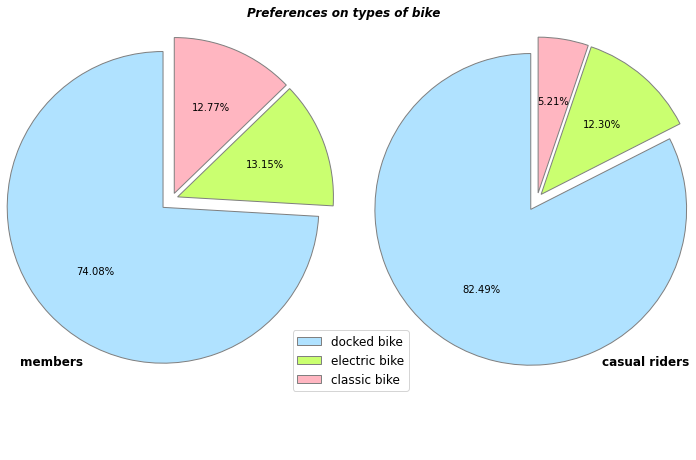

In [69]:
%matplotlib inline

# plot: The preference that members versus casual riders based on the types of bikes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

# left plot: members
ax1.pie(m_biketrips['rideable_type'].value_counts(),
        explode = [0.1, 0.05, 0.05],
        wedgeprops = {'edgecolor':'grey'},
        colors = ['#b0e2ff', '#caff70', '#ffb6c1'],
        startangle = 90, 
        radius = 1.28,
        autopct = "%1.2f%%")

ax1.set_xlabel("members", 
               loc = 'left', 
               fontweight = 'bold', 
               fontsize = 'large')

# right plot: casual members
ax2.pie(c_biketrips['rideable_type'].value_counts(),
        explode = [0.1, 0.05, 0.05],
        wedgeprops = {'edgecolor':'grey'},
        colors = ['#b0e2ff', '#caff70', '#ffb6c1'],
        startangle = 90, 
        radius = 1.28, 
        autopct = "%1.2f%%")

ax2.set_xlabel("casual riders", 
               loc = 'right', 
               fontweight = 'bold', 
               fontsize = 'large')

fig.legend(labels = ['docked bike', 'electric bike', 'classic bike'], 
           loc = (0.42, 0.15), 
           fontsize = 'large')
fig.suptitle("Preferences on types of bike", 
             y = 0.77, 
             fontsize = 'large', 
             fontweight = 'bold', 
             fontstyle = 'italic')

plt.show()

<h4 style="color:green;"> (3-4) How long do bike ride lengths usually last? </h4>

In [9]:
# for members:

# drop invalid records if the end times is earlier or equal to the start times 
m_biketrips = m_biketrips[m_biketrips['ended_at'] > m_biketrips['started_at']]

# create a column "ride_length_minutes" by subtracting "ended_at" from "started_at"
ride_length = m_biketrips['ended_at'] - m_biketrips['started_at']
m_biketrips.insert(4, "ride_length_minutes", ride_length.dt.total_seconds() / 60)

In [10]:
# for casual riders: 

# drop invalid records if the end times is earlier or equal to the start times
c_biketrips = c_biketrips[c_biketrips['ended_at'] > c_biketrips['started_at']]

# create a column "ride_length_minutes" by subtracting "ended_at" from "started_at"
ride_length = c_biketrips['ended_at'] - c_biketrips['started_at']
c_biketrips.insert(4, "ride_length_minutes", ride_length.dt.total_seconds() / 60)

In [11]:
# create a function to count the numbers of bike rides based on the lengths
from collections import Counter
c = Counter()

def minutes_category(ser):
    for s in ser:
        if s <= 1: c.update("1")  # category 1: less than or equal to 1 mintue
        elif 1 < s <= 10: c.update("2")  # category 2: less than or equal to 10 minutes
        elif 10 < s <= 30: c.update("3")  # category 3: less than or equal to 30 minutes
        elif 30 < s <= 60: c.update("4")  # category 4: less than or equal to 60 minutes
        elif 60 < s <= 720: c.update("5")  # category 5: less than or equal to 12 hours
        elif 720 < s <= 1440: c.update("6")  # category 6: less than or equal to 24 hours
        elif 1440 < s <= 43200: c.update("7")  # category 7: more than 1 day, but less than 30 days
        else:
            c.update("8")  # category 8: more than 30 days
    return c

In [12]:
# get a sorted Counter of members' ride lengths
m_ride_length_minutes = dict(sorted(minutes_category(m_biketrips['ride_length_minutes']).items()))

# get a sorted Counter of casual riders' ride lengths
c_ride_length_minutes = dict(sorted(minutes_category(c_biketrips['ride_length_minutes']).items()))

In [13]:
# create a function to display percentages for each category on sub-barplots by each ax
from itertools import chain

def display_pct_on_subbar(ax, values1, values2, all_values1, all_values2):
    ax_values = [x for z in zip(values1, values2) for x in z]  # get all values for each ax
    total = sum(all_values1 + all_values2)  # get total length of all bike rides
    for p in ax.patches:
        pct = '{:.2f}%'.format(p.get_height() / total * 100, p.get_height())
        w = p.get_width()
        h = p.get_height()
        x = p.get_x() + w / 2
        y = p.get_y() + h * 1.01
        ax.annotate(pct, (x,y), ha = 'center', fontsize = 'x-small', color='blue')

<IPython.core.display.Javascript object>


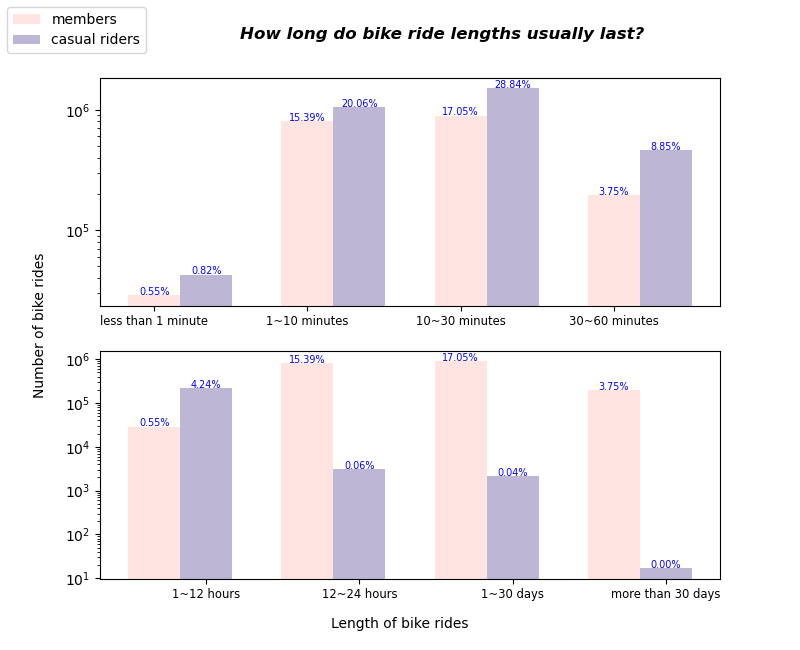

In [26]:
%matplotlib notebook

# plot: How long do bike rides usually last?

# get all values for members' and casual riders' bike lengths
m_values = [mv for mv in m_ride_length_minutes.values()]
c_values = [cv for cv in c_ride_length_minutes.values()]

# divide all lengths of bike rides into 2 cateogories
categories_1 = ['less than 1 minute', '1~10 minutes', '10~30 minutes', '30~60 minutes']
categories_2 = ['1~12 hours', '12~24 hours', '1~30 days', 'more than 30 days']

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(8, 6.5))

# subplot 1:
ax1_xindexes = np.arange(len(categories_1))
ax1_m_values = m_values[:4]
ax1_c_values = c_values[:4]

ax1.bar(ax1_xindexes, ax1_m_values, 
        width = 0.34, 
        label = 'members', 
        color = '#ffe4e1', 
        log = True)
ax1.bar(ax1_xindexes+0.34, ax1_c_values, 
        width = 0.34, 
        label = 'casual riders', 
        color = '#bdb6d5', 
        log = True)

ax1.set_xticks(ticks = ax1_xindexes)
ax1.set_xticklabels(labels = categories_1, 
                    fontdict={'ha':'center', 'va':'top', 'fontsize':'small'})

# display percentages on subplot1 using 'display_pct_on_subbar' function above
display_pct_on_subbar(ax1, ax1_m_values, ax1_c_values, m_values, c_values)

# subplot 2:
ax2_indexes = np.arange(len(categories_2))
ax2_m_values = m_values[:4]
ax2_c_values = c_values[4:]

ax2.bar(ax2_indexes - 0.34, ax2_m_values, 
        width = 0.34, 
        label = 'members', 
        color = '#ffe4e1', 
        log = True)
ax2.bar(ax2_indexes, ax2_c_values, 
        width = 0.34, 
        label='casual riders', 
        color = '#bdb6d5', 
        log=True)

ax2.set_xticks(ticks = ax2_indexes)
ax2.set_xticklabels(labels = categories_2, 
                    fontdict={'ha':'center', 'va':'top', 'fontsize':'small'})

# display percentages on subplot2 using 'display_pct_on_subbar' function above
display_pct_on_subbar(ax2, ax2_m_values, ax2_c_values, m_values, c_values)

fig.legend(labels = ['members', 'casual riders'], 
           loc='upper left', 
           fontsize='medium')
fig.text(0.5, 0.04, 
         "Length of bike rides", 
         ha="center", 
         va="center")
fig.text(0.05, 0.5, 
         "Number of bike rides", 
         ha="center", 
         va="center", 
         rotation = 90)
fig.text(0.3, 0.94, 
         'How long do bike ride lengths usually last?', 
         fontsize = 'large', 
         fontstyle = 'italic', 
         fontweight = 'semibold')

fig.show()

<h4 style="color:green;"> (3-5) How many bike rides initiated based on days of a week? </h4>

In [15]:
# create a column "started_at_day_name" to get the day names of the start day of each bike ride
m_biketrips.insert(3, "started_at_day_name", m_biketrips['started_at'].dt.day_name())

# create a column "started_at_day_name" to get the day names of the start day of each bike ride
c_biketrips.insert(3, "started_at_day_name", c_biketrips['started_at'].dt.day_name())

<IPython.core.display.Javascript object>


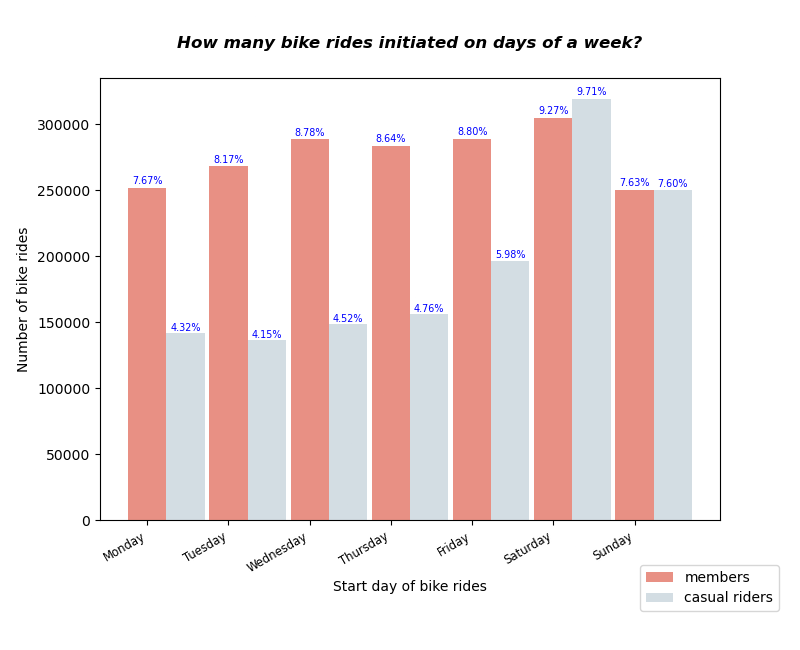

In [27]:
%matplotlib notebook

# plot: How many bike rides initiated based on days of a week?

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
m_startdays = m_biketrips['started_at_day_name'].value_counts().reindex(index=days)
c_startdays = c_biketrips['started_at_day_name'].value_counts().reindex(index=days)

x_indexes = np.arange(len(days))
b_width = 0.47

fig, ax = plt.subplots(figsize = (8, 6.5))

# first, plot data for members
ax.bar(x_indexes, m_startdays.values, 
       width = b_width, 
       label = 'members', 
       color = '#e89084')

# then, plot data for casual riders
ax.bar(x_indexes + b_width, c_startdays.values, 
       width = b_width, 
       label = 'casual riders', 
       color = '#d3dde3')

# display percentages using 'display_pct_on_subbar' function above
display_pct_on_subbar(ax, m_startdays.values, c_startdays.values, m_startdays.values, c_startdays.values)

ax.set_xticks(ticks = x_indexes)
ax.set_xticklabels(labels = days, 
                   fontdict = {'ha':'left', 'va':'top', 'fontsize':'small'})

ax.set_title("How many bike rides initiated on days of a week?", 
             y = 1.05,
             fontsize = 'large', 
             fontstyle = 'italic', 
             fontweight = 'semibold')
ax.set_xlabel("Start day of bike rides")
ax.set_ylabel("Number of bike rides")

fig.autofmt_xdate()
fig.legend(loc = (0.8, 0.06))

fig.show()

<h4 style="color:green;"> (3-6) How many bike rides ended based on days of a week? </h4>

In [17]:
# create a column "ended_at_day_name" to get the day names of the end day of each bike ride
m_biketrips.insert(5, "ended_at_day_name", m_biketrips['ended_at'].dt.day_name())

# create a column "ended_at_day_name" to get the day names of the end day of each bike ride
c_biketrips.insert(5, "ended_at_day_name", c_biketrips['ended_at'].dt.day_name())

<IPython.core.display.Javascript object>


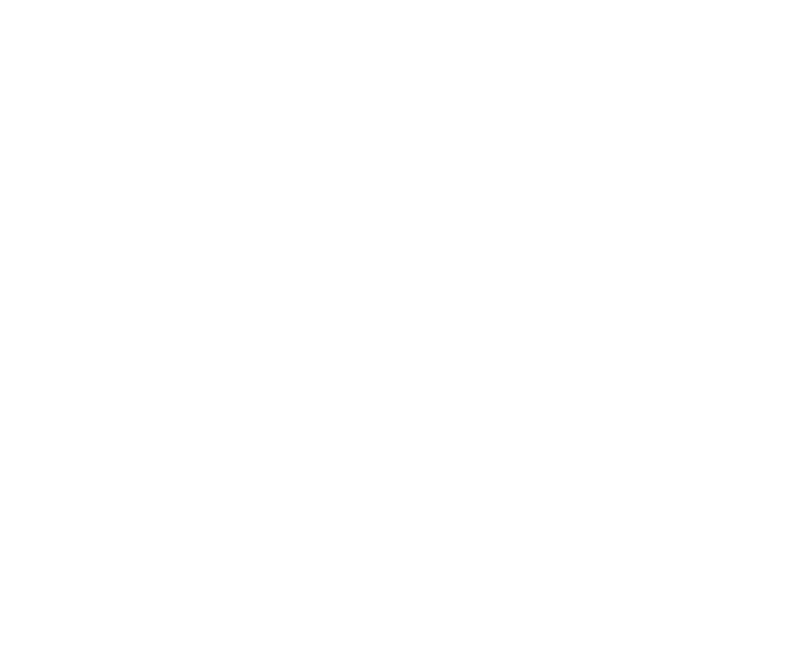

In [18]:
%matplotlib notebook

# plot: How many bike rides ended based on days of a week?

m_enddays = m_biketrips['ended_at_day_name'].value_counts().reindex(index=days)
c_enddays = c_biketrips['ended_at_day_name'].value_counts().reindex(index=days)

x_indexes = np.arange(len(days))
b_width = 0.47

fig, ax = plt.subplots(figsize = (8, 6.5))

# first, plot data for members
ax.bar(x_indexes, m_enddays.values, 
       width = b_width, 
       label = 'members', 
       color = '#e89084')

# then, plot data for casual riders
ax.bar(x_indexes + b_width, c_enddays.values, 
       width = b_width, 
       label = 'casual riders', 
       color = '#d3dde3')

# display percentages using 'display_pct_on_subbar' function above
display_pct_on_subbar(ax, m_enddays.values, c_enddays.values, m_enddays.values, c_enddays.values)

ax.set_xticks(ticks = x_indexes)
ax.set_xticklabels(labels = days, 
                   fontdict = {'ha':'left', 'va':'top', 'fontsize':'small'})

ax.set_title("How many bike rides ended on days of a week?", 
             y = 1.05,
             fontsize = 'large', 
             fontstyle = 'italic', 
             fontweight = 'semibold')
ax.set_xlabel("End day of bike rides")
ax.set_ylabel("Number of bike rides")

fig.autofmt_xdate()
fig.legend(loc = (0.8, 0.06))

fig.show()

<h4 style="color:green;"> (3-7) What are the average bike ride lengths initiated based on days of a week? </h4>

In [19]:
# for members: get the average bike ride lengths initiated based on days
m_by_days = m_biketrips.groupby(['started_at_day_name'])
m_avg_rl = m_by_days['ride_length_minutes'].agg('mean').reindex(index=days)

# for casual riders: get the average bike ride lengths initiated based on days
c_by_days = c_biketrips.groupby(['started_at_day_name'])
c_avg_rl = c_by_days['ride_length_minutes'].agg('mean').reindex(index=days)

<IPython.core.display.Javascript object>


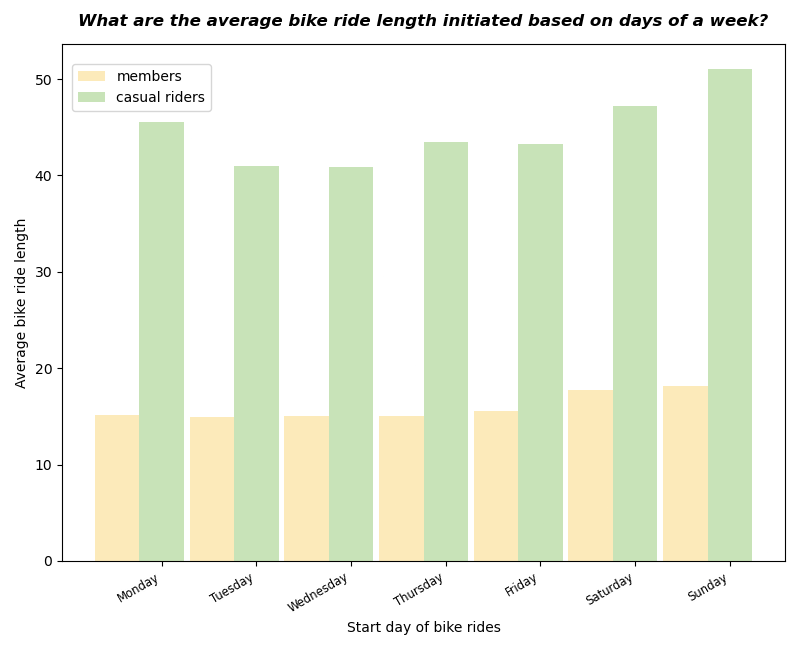

In [20]:
%matplotlib notebook

# plot: What are the average bike ride length initiated based on days of a week?

x_indexes = np.arange(len(days))
b_width = 0.47

fig, ax = plt.subplots(figsize=(8, 6.5))

# first, plot data for members
ax.bar(x_indexes - b_width, m_avg_rl.values, 
       width = b_width, 
       label = 'members', 
       color='#fceaba')

# then, plot data for casual riders
ax.bar(x_indexes, c_avg_rl.values, 
       width = b_width, 
       label = 'casual riders', 
       color = '#c8e3b8')

ax.set_xticks(ticks=x_indexes)
ax.set_xticklabels(labels = days, 
                   fontdict = {'ha':'left', 'va':'top', 'fontsize':'small'})

ax.set_title("What are the average bike ride length initiated based on days of a week?", 
             y = 1.02,
             fontsize = 'large', 
             fontstyle = 'italic', 
             fontweight = 'semibold')
ax.set_xlabel("Start day of bike rides")
ax.set_ylabel("Average bike ride length")

fig.autofmt_xdate()
fig.legend(loc = (0.09, 0.83))
fig.tight_layout()

fig.show()

<h4 style="color:green;"> (3-8) What are the top 10 bike stations used by members versus casual riders? </h4>

In [21]:
# create a function to calculate the top 10 bike stations used

def top_10_stations(start_ser, end_ser):
    d1, d2 = {}, {}
    c1, c2 = 0, 0
    
    # get a dictionary of station id (key) and used count (value) for start stations
    for i1, v1 in zip(start_ser.index, start_ser.values):
        if c1 > 10:
            break
        d1[i1] = v1
        c1 += 1
        
    # get a dictionary of station id (key) and used count (value) for start stations
    for i2, v2 in zip(end_ser.index, end_ser.values):
        if c2 > 10:
            break
        d2[i2] = v2
        c2 += 1
    
    # combine these two dictionaries to get the final top 10 stations and their used counts
    for idx, value in d2.items():
        if idx in d1.keys():
            d1[idx] = d1[idx] + value
        else:
            d1[idx] = value
    
    d1 = dict(sorted(d1.items(), key=lambda item: item[1], reverse=True)[:10])
    
    return d1

In [22]:
# get the top 10 bike stations used by members
m_10_stations = top_10_stations(m_biketrips['start_station_id'].value_counts(), 
                                m_biketrips['end_station_id'].value_counts())

# get the top 10 bike stations used by casual riders
c_10_stations = top_10_stations(c_biketrips['start_station_id'].value_counts(), 
                                c_biketrips['end_station_id'].value_counts())

<IPython.core.display.Javascript object>


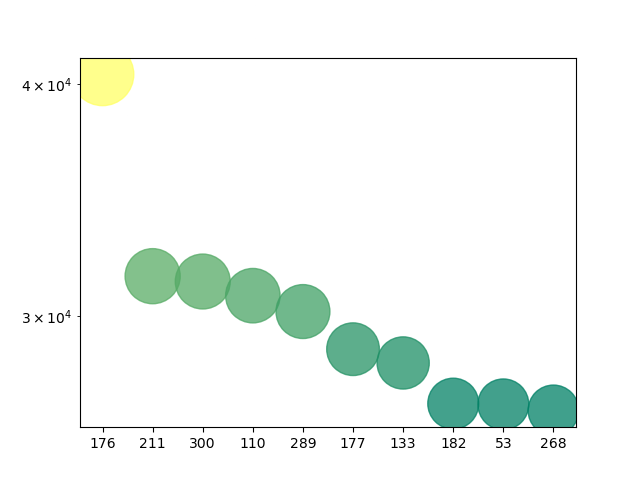

In [100]:
%matplotlib notebook

# first, plot data for members
x_indexes = np.arange(10)
total = sum(m_10_stations.values())
ratio = [v/total for v in m_10_stations.values()]

plt.scatter(x_indexes, m_10_stations.values(),
            c = ratio,
            s = [v/20 for v in m_10_stations.values()],
            cmap = 'summer',
            alpha = 0.75)
plt.yscale('log')

plt.xticks(ticks = x_indexes, labels = m_10_stations.keys())

plt.show()